## Загрузка данных
https://drive.google.com/file/d/161LrxzLr9CLTWWzbQfL-lOnV2z527Otn/view?usp=drive_link

In [ ]:
! gdown 161LrxzLr9CLTWWzbQfL-lOnV2z527Otn

Downloading...
From: https://drive.google.com/uc?id=161LrxzLr9CLTWWzbQfL-lOnV2z527Otn
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 77.5MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df['Survived'].mean()  # выживших 38 %

0.3838383838383838

## Определение выборок

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# применяем стратификацию (одинаковое соотношение в выборках выживших и
# и погибших пассажиров)
train, test = train_test_split(df, train_size=0.6, random_state=42,
                               stratify=df['Survived'])

In [ ]:
val, test = train_test_split(test, train_size=0.5, random_state=42,
                             stratify=test['Survived'])

In [ ]:
train['Survived'].mean()

0.3838951310861423

In [ ]:
val['Survived'].mean()

0.38202247191011235

In [ ]:
test['Survived'].mean()

0.3854748603351955

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full) / len(df)

0.7991021324354658

In [ ]:
len(test) / len(df)

0.20089786756453423

In [ ]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S


## Человеческое обучение. Анализ данных

In [ ]:
train_full['score_mean'] = train_full['Survived'].mean()

In [ ]:
# средний процент выживаемости у женщин выше, чем у мужчин
train_full.groupby('Sex')['Survived'].agg(['count', 'mean'])

,count,mean
Sex,,
female,255,0.737255
male,457,0.185996


In [ ]:
len(train_full)

712

In [ ]:
model = train_full.groupby('Sex')['Survived'].mean().reset_index()

In [ ]:
model = model.rename({'Survived': 'score_sex_mean'}, axis=1)

In [ ]:
train_full = train_full.merge(model, how='left', on='Sex')

In [ ]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_mean,score_sex_mean
0,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0.383427,0.185996
1,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,0.383427,0.737255
2,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,0.383427,0.185996
3,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,0.383427,0.737255
4,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,0.383427,0.185996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0.383427,0.185996
708,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,0.383427,0.185996
709,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0.383427,0.185996
710,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,0.383427,0.737255


In [ ]:
# чем класс престижнее, т.е., чем человек более состоятельнее, тем шансов
# у него выжить больше
train_full.groupby('Pclass')['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,169,0.633136
2,146,0.486301
3,397,0.239295


In [ ]:
model = train_full.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

In [ ]:
model

,Sex,Pclass,Survived
0,female,1,0.972973
1,female,2,0.903226
2,female,3,0.504202
3,male,1,0.368421
4,male,2,0.178571
5,male,3,0.125899


In [ ]:
model = model.rename({'Survived': 'score_sex_pclass_mean'}, axis=1)

In [ ]:
train_full = train_full.merge(model, how='left', on=['Sex', 'Pclass'])

In [ ]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_mean,score_sex_mean,score_sex_pclass_mean
0,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0.383427,0.185996,0.125899
1,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,0.383427,0.737255,0.903226
2,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,0.383427,0.185996,0.125899
3,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,0.383427,0.737255,0.504202
4,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,0.383427,0.185996,0.125899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0.383427,0.185996,0.178571
708,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,0.383427,0.185996,0.178571
709,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0.383427,0.185996,0.368421
710,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,0.383427,0.737255,0.903226


In [ ]:
test = test.merge(model, how='left', on=['Sex', 'Pclass'])

In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean
0,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0.903226
1,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,0.903226
2,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,0.504202
3,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,0.125899
4,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,0.504202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0.125899
175,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0.178571
176,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,0.903226
177,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,0.903226


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


<Axes: >

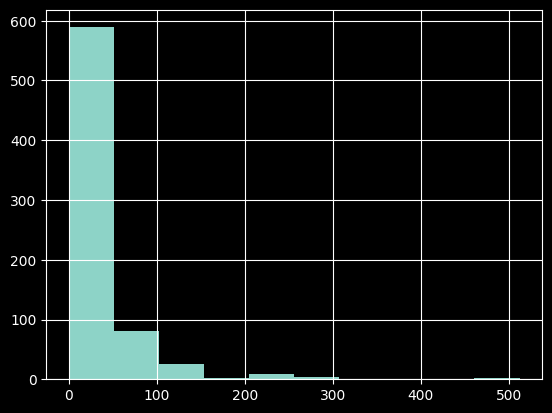

In [ ]:
train_full['Fare'].hist()

In [ ]:
train_full['Fare_group'] = pd.cut(train_full['Fare'],
 [-float('inf'), 10, 50, 100, float('inf')])

In [ ]:
# чем плата за проезд выше, т.е., чем человек более состоятельнее,
# тем шансов у него выжить больше
train_full.groupby('Fare_group')['Survived'].agg(['count', 'mean'])

,count,mean
Fare_group,,
"(-inf, 10.0]",280,0.203571
"(10.0, 50.0]",308,0.422078
"(50.0, 100.0]",82,0.646341
"(100.0, inf]",42,0.785714


In [ ]:
train_full.isna().mean()

PassengerId              0.000000
Survived                 0.000000
Pclass                   0.000000
Name                     0.000000
Sex                      0.000000
Age                      0.196629
SibSp                    0.000000
Parch                    0.000000
Ticket                   0.000000
Fare                     0.000000
Cabin                    0.776685
Embarked                 0.002809
score_mean               0.000000
score_sex_mean           0.000000
score_sex_pclass_mean    0.000000
Fare_group               0.000000
dtype: float64

In [ ]:
train_full[train_full['Fare_group'].isnull()].index

Int64Index([], dtype='int64')

In [ ]:
train_full['Fare_group'] = train_full['Fare_group'].cat.add_categories(0)

In [ ]:
train_full.loc[[51, 56, 121, 154, 168, 209, 428, 467, 598, 632, 670],
               'Fare_group'] = train_full.loc[[51, 56, 121, 154, 168, 209,
                                               428, 467, 598, 632, 670],
                                              'Fare_group'].fillna(0)

In [ ]:
train_full.iloc[[51, 56, 121, 154, 168, 209, 428, 467, 598, 632, 670]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_mean,score_sex_mean,score_sex_pclass_mean,Fare_group
51,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,0.383427,0.185996,0.178571,"(-inf, 10.0]"
56,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.383427,0.185996,0.368421,"(-inf, 10.0]"
121,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0.383427,0.185996,0.125899,"(-inf, 10.0]"
154,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0.383427,0.185996,0.125899,"(-inf, 10.0]"
168,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0.383427,0.185996,0.178571,"(-inf, 10.0]"
209,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0.383427,0.185996,0.178571,"(-inf, 10.0]"
428,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0.383427,0.185996,0.368421,"(-inf, 10.0]"
467,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,0.383427,0.185996,0.368421,"(-inf, 10.0]"
598,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0.383427,0.185996,0.178571,"(-inf, 10.0]"
632,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0.383427,0.185996,0.125899,"(-inf, 10.0]"


In [ ]:
model = train_full.groupby(['Sex', 'Pclass',
                            'Fare_group'])['Survived'].mean().reset_index()

In [ ]:
model

,Sex,Pclass,Fare_group,Survived
0,female,1,"(-inf, 10.0]",NaN
1,female,1,"(10.0, 50.0]",0.909091
2,female,1,"(50.0, 100.0]",1.000000
3,female,1,"(100.0, inf]",0.965517
4,female,1,0,NaN
5,female,2,"(-inf, 10.0]",NaN
6,female,2,"(10.0, 50.0]",0.900000
7,female,2,"(50.0, 100.0]",1.000000
8,female,2,"(100.0, inf]",NaN
9,female,2,0,NaN


In [ ]:
model = model.rename({'Survived': 'score_sex_pclass_fare_mean'}, axis=1)

In [ ]:
train_full = train_full.merge(model, how='left', on=['Sex', 'Pclass',
                                                     'Fare_group'])

In [ ]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_mean,score_sex_mean,score_sex_pclass_mean,Fare_group,score_sex_pclass_fare_mean
0,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0.383427,0.185996,0.125899,"(-inf, 10.0]",0.103286
1,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,0.383427,0.737255,0.903226,"(10.0, 50.0]",0.900000
2,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,0.383427,0.185996,0.125899,"(10.0, 50.0]",0.145455
3,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,0.383427,0.737255,0.504202,"(10.0, 50.0]",0.416667
4,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,0.383427,0.185996,0.125899,"(-inf, 10.0]",0.103286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0.383427,0.185996,0.178571,"(10.0, 50.0]",0.197368
708,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,0.383427,0.185996,0.178571,"(10.0, 50.0]",0.197368
709,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0.383427,0.185996,0.368421,"(50.0, 100.0]",0.387097
710,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,0.383427,0.737255,0.903226,"(10.0, 50.0]",0.900000


<Axes: >

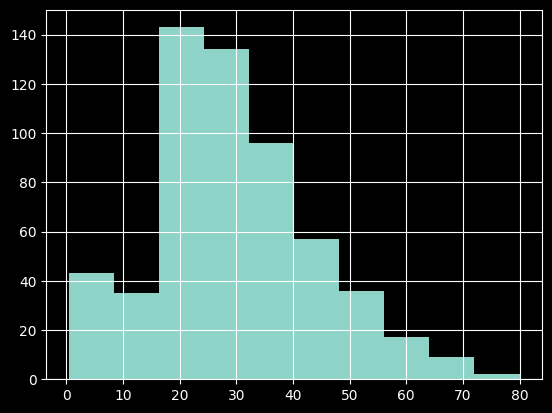

In [ ]:
train_full['Age'].hist()

In [ ]:
train_full['Age_group'] = pd.cut(train_full['Age'],
 [-float('inf'), 10, 20, 40, 60, float('inf')])

In [ ]:
# чем человек моложе, тем шансов выжить больше.
train_full.groupby('Age_group')['Survived'].agg(['count', 'mean'])

,count,mean
Age_group,,
"(-inf, 10.0]",51,0.627451
"(10.0, 20.0]",86,0.383721
"(20.0, 40.0]",314,0.382166
"(40.0, 60.0]",102,0.411765
"(60.0, inf]",19,0.263158


In [ ]:
train_full.groupby(['Sex', 'Pclass', 'Age_group'])['Survived'].agg(['count',
                                                                    'mean'])

count      mean
Sex    Pclass Age_group                    
female 1      (-inf, 10.0]      0       NaN
              (10.0, 20.0]      9  1.000000
              (20.0, 40.0]     37  0.972973
              (40.0, 60.0]     21  0.952381
              (60.0, inf]       2  1.000000
       2      (-inf, 10.0]      8  1.000000
              (10.0, 20.0]      5  1.000000
              (20.0, 40.0]     35  0.885714
              (40.0, 60.0]     12  0.833333
              (60.0, inf]       0       NaN
       3      (-inf, 10.0]     17  0.529412
              (10.0, 20.0]     21  0.523810
              (20.0, 40.0]     41  0.463415
              (40.0, 60.0]      7  0.000000
              (60.0, inf]       1  1.000000
male   1      (-inf, 10.0]      2  1.000000
              (10.0, 20.0]      3  0.333333
              (20.0, 40.0]     33  0.454545
              (40.0, 60.0]     28  0.392857
              (60.0, inf]       9  0.111111
       2      (-inf, 10.0]      9  1.000000
              (10.0, 20.0]      7  0.000000
              (20.0, 40.0]     46  0.065217
              (40.0, 60.0]     13  0.076923
              (60.0, inf]       3  0.333333
       3      (-inf, 10.0]     15  0.266667
              (10.0, 20.0]     41  0.170732
              (20.0, 40.0]    122  0.131148
              (40.0, 60.0]     21  0.000000
              (60.0, inf]       4  0.000000

In [ ]:
train_full.isna().mean()

PassengerId                   0.000000
Survived                      0.000000
Pclass                        0.000000
Name                          0.000000
Sex                           0.000000
Age                           0.196629
SibSp                         0.000000
Parch                         0.000000
Ticket                        0.000000
Fare                          0.000000
Cabin                         0.776685
Embarked                      0.002809
score_mean                    0.000000
score_sex_mean                0.000000
score_sex_pclass_mean         0.000000
Fare_group                    0.000000
score_sex_pclass_fare_mean    0.000000
Age_group                     0.196629
dtype: float64

In [ ]:
train_full[train_full['Age_group'].isnull()].index

Int64Index([  2,  19,  25,  33,  43,  44,  45,  46,  48,  51,
            ...
            672, 676, 677, 681, 689, 690, 694, 696, 703, 709],
           dtype='int64', length=140)

In [ ]:
train_full['Age_group'] = train_full['Age_group'].cat.add_categories(0)

In [ ]:
train_full['Age_group'] = train_full['Age_group'].fillna(0)

In [ ]:
model = train_full.groupby(['Sex', 'Pclass',
                            'Age_group'])['Survived'].mean().reset_index()

In [ ]:
model

,Sex,Pclass,Age_group,Survived
0,female,1,"(-inf, 10.0]",NaN
1,female,1,"(10.0, 20.0]",1.000000
2,female,1,"(20.0, 40.0]",0.972973
3,female,1,"(40.0, 60.0]",0.952381
4,female,1,"(60.0, inf]",1.000000
5,female,1,0,1.000000
6,female,2,"(-inf, 10.0]",1.000000
7,female,2,"(10.0, 20.0]",1.000000
8,female,2,"(20.0, 40.0]",0.885714
9,female,2,"(40.0, 60.0]",0.833333


In [ ]:
model = model.rename({'Survived': 'score_sex_pclass_age_mean'}, axis=1)

In [ ]:
train_full = train_full.merge(model, how='left', on=['Sex', 'Pclass',
                                                     'Age_group'])

In [ ]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_mean,score_sex_mean,score_sex_pclass_mean,Fare_group,score_sex_pclass_fare_mean,Age_group,score_sex_pclass_age_mean
0,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0.383427,0.185996,0.125899,"(-inf, 10.0]",0.103286,"(10.0, 20.0]",0.170732
1,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,0.383427,0.737255,0.903226,"(10.0, 50.0]",0.900000,"(20.0, 40.0]",0.885714
2,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,0.383427,0.185996,0.125899,"(10.0, 50.0]",0.145455,0,0.106667
3,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,0.383427,0.737255,0.504202,"(10.0, 50.0]",0.416667,"(20.0, 40.0]",0.463415
4,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,0.383427,0.185996,0.125899,"(-inf, 10.0]",0.103286,"(20.0, 40.0]",0.131148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,0.383427,0.185996,0.178571,"(10.0, 50.0]",0.197368,"(20.0, 40.0]",0.065217
708,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,0.383427,0.185996,0.178571,"(10.0, 50.0]",0.197368,"(40.0, 60.0]",0.076923
709,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0.383427,0.185996,0.368421,"(50.0, 100.0]",0.387097,0,0.250000
710,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S,0.383427,0.737255,0.903226,"(10.0, 50.0]",0.900000,"(20.0, 40.0]",0.885714


In [ ]:
test['Age_group'] = pd.cut(train_full['Age'], [-float('inf'), 10, 20, 40, 60, float('inf')])

In [ ]:
test['Age_group'] = test['Age_group'].cat.add_categories(0)

In [ ]:
test['Age_group'] = test['Age_group'].fillna(0)

In [ ]:
test = test.merge(model, how='left', on=['Sex', 'Pclass', 'Age_group'])

In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean,Age_group,score_sex_pclass_age_mean
0,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000
1,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,0.903226,"(20.0, 40.0]",0.885714
2,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,0.504202,0,0.625000
3,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,0.125899,"(20.0, 40.0]",0.131148
4,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,0.504202,"(20.0, 40.0]",0.463415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0.125899,0,0.106667
175,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0.178571,0,0.166667
176,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,0.903226,"(20.0, 40.0]",0.885714
177,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000


In [ ]:
test.isna().mean()

PassengerId                  0.000000
Survived                     0.000000
Pclass                       0.000000
Name                         0.000000
Sex                          0.000000
Age                          0.206704
SibSp                        0.000000
Parch                        0.000000
Ticket                       0.000000
Fare                         0.000000
Cabin                        0.748603
Embarked                     0.000000
score_sex_pclass_mean        0.000000
Age_group                    0.000000
score_sex_pclass_age_mean    0.016760
dtype: float64

In [ ]:
test[test['score_sex_pclass_age_mean'].isnull()].index

Int64Index([11, 135, 163], dtype='int64')

In [ ]:
test['score_sex_pclass_age_mean'] = test['score_sex_pclass_age_mean'].fillna(0)

In [ ]:
test.iloc[[121]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean,Age_group,score_sex_pclass_age_mean
121,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0,NaN,S,0.903226,"(10.0, 20.0]",1.0


## Оценка качества модели человеческого обучения

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(train_full['Survived'], train_full['score_mean'])

0.6657168967694277

In [ ]:
log_loss(train_full['Survived'], train_full['score_sex_mean'])

0.5145830738083393

In [ ]:
log_loss(train_full['Survived'], train_full['score_sex_pclass_mean'])

0.4474009408811864

In [ ]:
log_loss(train_full['Survived'], train_full['score_sex_pclass_fare_mean'])

0.4288100193645174

In [ ]:
log_loss(train_full['Survived'], train_full['score_sex_pclass_age_mean'])
# ошибка самая маленькая на модели при расчете выживаемости на основе
# данных пола, класса кабины, возраста пассажира

0.3926318041328191

In [ ]:
log_loss(test['Survived'], test['score_sex_pclass_mean'])

0.4525256835682467

In [ ]:
log_loss(test['Survived'], test['score_sex_pclass_age_mean'])

1.5864130673904355

## Машинное обучение

In [ ]:
! pip install CatBoost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'score_mean',
       'score_sex_mean', 'score_sex_pclass_mean', 'Fare_group',
       'score_sex_pclass_fare_mean', 'Age_group', 'score_sex_pclass_age_mean'],
      dtype='object')

In [ ]:
X = ['Pclass', 'Sex', 'Age', 'Fare']
cat_features = ['Sex']
y = ['Survived']

In [ ]:
params = {
    'verbose': 100,
    'random_seed': 42,
   'learning_rate': 0.0037
}

In [ ]:
from catboost import Pool

train_data = Pool(
    data=train[X],
    label=train[y],
    cat_features = cat_features
)

valid_data = Pool(
    data=val[X],
    label=val[y],
    cat_features = cat_features
)

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6908933	test: 0.6907175	best: 0.6907175 (0)	total: 1.34ms	remaining: 1.34s
100:	learn: 0.5480442	test: 0.5370820	best: 0.5370820 (100)	total: 258ms	remaining: 2.3s
200:	learn: 0.4840922	test: 0.4688041	best: 0.4688041 (200)	total: 426ms	remaining: 1.69s
300:	learn: 0.4476442	test: 0.4322371	best: 0.4322371 (300)	total: 656ms	remaining: 1.52s
400:	learn: 0.4240569	test: 0.4118500	best: 0.4118500 (400)	total: 809ms	remaining: 1.21s
500:	learn: 0.4085303	test: 0.4000859	best: 0.4000859 (500)	total: 907ms	remaining: 904ms
600:	learn: 0.3964633	test: 0.3934005	best: 0.3934005 (600)	total: 991ms	remaining: 658ms
700:	learn: 0.3875648	test: 0.3894238	best: 0.3894238 (700)	total: 1.07s	remaining: 455ms
800:	learn: 0.3800408	test: 0.3872348	best: 0.3871417 (798)	total: 1.14s	remaining: 283ms
900:	learn: 0.3729877	test: 0.3850542	best: 0.3850156 (899)	total: 1.21s	remaining: 133ms
999:	learn: 0.3660848	test: 0.3839897	best: 0.3838553 (984)	total: 1.3s	remaining: 0us

bestTest = 0.383

In [ ]:
model.predict_proba(test[X])[:20]
# первый стобец - шанс умереть
# второй стобец - шанс выжить

array([[0.11100464, 0.88899536],
       [0.15208676, 0.84791324],
       [0.25148003, 0.74851997],
       [0.8072956 , 0.1927044 ],
       [0.50374901, 0.49625099],
       [0.52520487, 0.47479513],
       [0.04433547, 0.95566453],
       [0.85151229, 0.14848771],
       [0.5768881 , 0.4231119 ],
       [0.8016472 , 0.1983528 ],
       [0.25474459, 0.74525541],
       [0.03418972, 0.96581028],
       [0.86247892, 0.13752108],
       [0.59966006, 0.40033994],
       [0.04783807, 0.95216193],
       [0.85812707, 0.14187293],
       [0.56317408, 0.43682592],
       [0.04465051, 0.95534949],
       [0.88255626, 0.11744374],
       [0.78686983, 0.21313017]])

In [ ]:
test['score_all_importance_features'] = model.predict_proba(test[X])[:,1]

In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean,Age_group,score_sex_pclass_age_mean,score_all_importance_features
0,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.888995
1,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,0.903226,"(20.0, 40.0]",0.885714,0.847913
2,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,0.504202,0,0.625000,0.748520
3,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,0.125899,"(20.0, 40.0]",0.131148,0.192704
4,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,0.504202,"(20.0, 40.0]",0.463415,0.496251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0.125899,0,0.106667,0.173755
175,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0.178571,0,0.166667,0.268979
176,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,0.903226,"(20.0, 40.0]",0.885714,0.837506
177,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.884647


In [ ]:
test['score_all_importance_features'].mean()

0.3737190290691889

In [ ]:
log_loss(test['Survived'], test['score_sex_pclass_age_mean'])

1.5864130673904355

In [ ]:
log_loss(test['Survived'], test['score_all_importance_features'])

0.43712481042748197

## Feature_importance

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Sex,44.548388
1,Pclass,22.649619
2,Age,17.419159
3,Fare,15.382834


## Графическое представление

In [ ]:
! pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


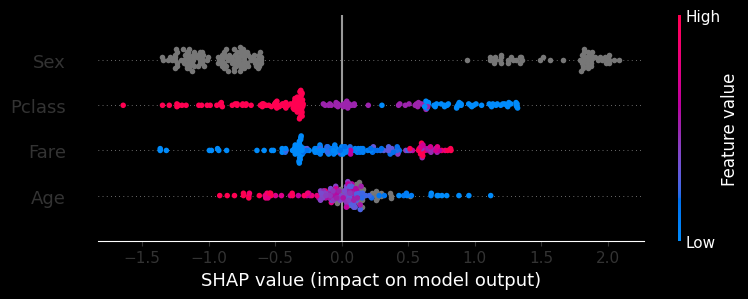

In [ ]:
shap.summary_plot(shap_values, test[X])

In [ ]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

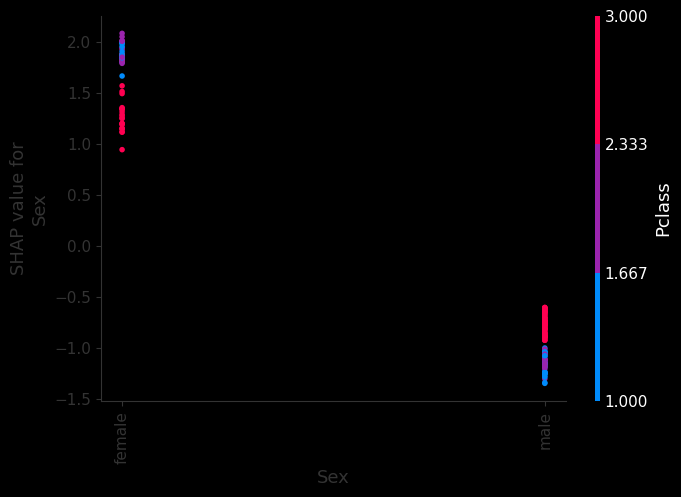

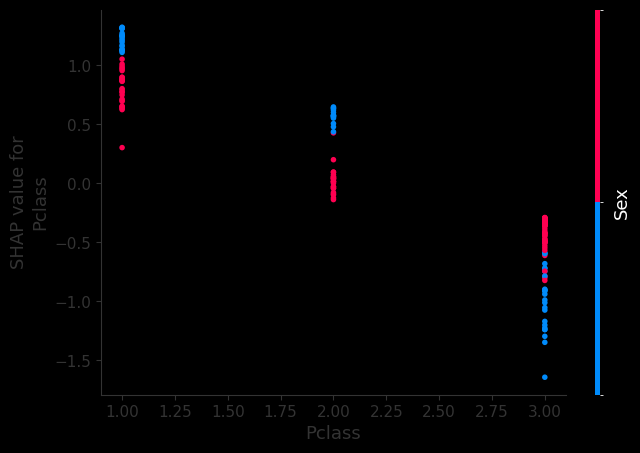

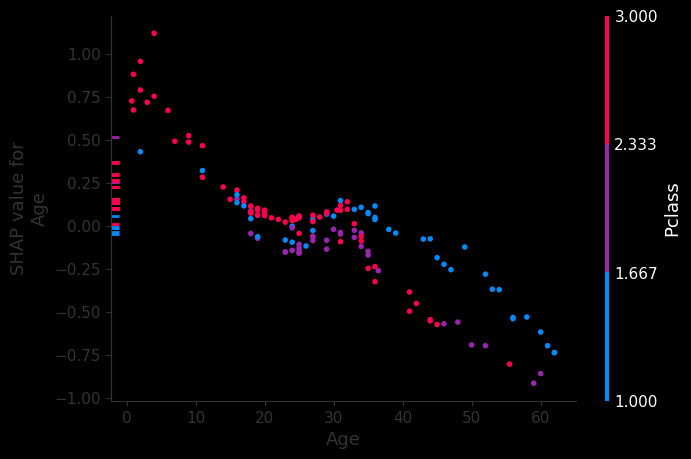

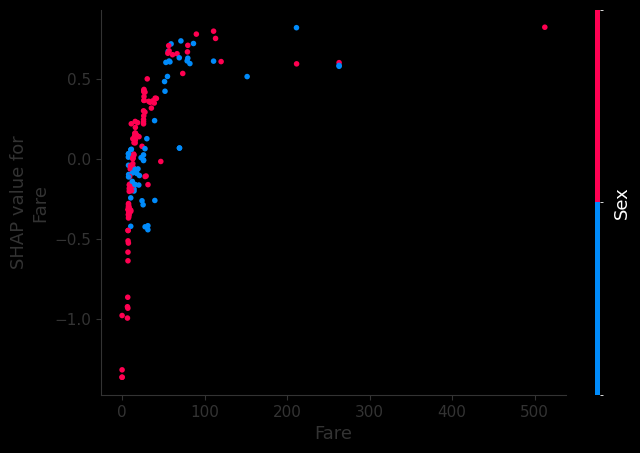

In [ ]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

## Установка порога выживаемости

<Axes: >

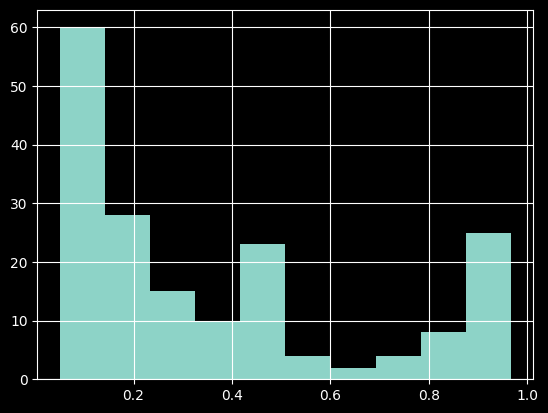

In [ ]:
test['score_all_importance_features'].hist()

In [ ]:
test['score_all_importance_features'].mean()

0.3737190290691889

In [ ]:
test['Survived'].mean()

0.3854748603351955

In [ ]:
# умножаем на 1,чтобы перевести бинарнй результта в числовой
test['y_pred'] = (test['score_all_importance_features'] > 0.5) * 1

In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean,Age_group,score_sex_pclass_age_mean,score_all_importance_features,y_pred
0,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.888995,1
1,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,0.903226,"(20.0, 40.0]",0.885714,0.847913,1
2,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,0.504202,0,0.625000,0.748520,1
3,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,0.125899,"(20.0, 40.0]",0.131148,0.192704,0
4,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,0.504202,"(20.0, 40.0]",0.463415,0.496251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0.125899,0,0.106667,0.173755,0
175,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0.178571,0,0.166667,0.268979,0
176,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,0.903226,"(20.0, 40.0]",0.885714,0.837506,1
177,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.884647,1


In [ ]:
test['y_pred'].mean()

0.2569832402234637

## Метрики

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test['Survived'], test['y_pred'])

array([[105,   5],
       [ 28,  41]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test['Survived'], test['y_pred']).ravel()

In [ ]:
tn, fp, fn, tp

(105, 5, 28, 41)

In [ ]:
recall = tp / (tp + fn)

In [ ]:
# модель правильно нашла 59 процентов выживших среди всех "настоящих" выживших
recall

0.5942028985507246

In [ ]:
precision = tp / (tp + fp)

In [ ]:
# модель правильно нашла 89 процентов выживших среди всех "предсказанных"
# выживших
precision

0.8913043478260869

In [ ]:
f1 = (2 * recall * precision) / (recall + precision)

In [ ]:
f1

0.7130434782608696

In [ ]:
# accuracy (процент правильных предсказаний)
(tp + tn) / (tp + tn + fp + fn)

0.8156424581005587

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['Survived'], test['y_pred']))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.89      0.59      0.71        69

    accuracy                           0.82       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.82      0.81       179



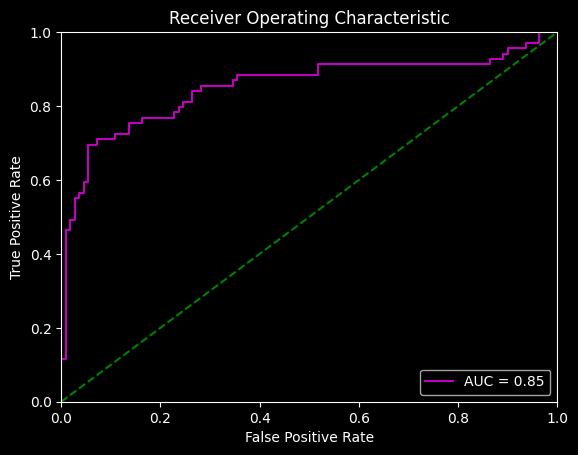

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(test['Survived'], test['score_all_importance_features'])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'm', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Сравнение человеческого и машинного обучения

In [ ]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,score_sex_pclass_mean,Age_group,score_sex_pclass_age_mean,score_all_importance_features,y_pred
0,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.888995,1
1,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,0.903226,"(20.0, 40.0]",0.885714,0.847913,1
2,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q,0.504202,0,0.625000,0.748520,1
3,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,0.125899,"(20.0, 40.0]",0.131148,0.192704,0
4,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,0.504202,"(20.0, 40.0]",0.463415,0.496251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0.125899,0,0.106667,0.173755,0
175,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0.178571,0,0.166667,0.268979,0
176,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,0.903226,"(20.0, 40.0]",0.885714,0.837506,1
177,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,0.903226,"(10.0, 20.0]",1.000000,0.884647,1


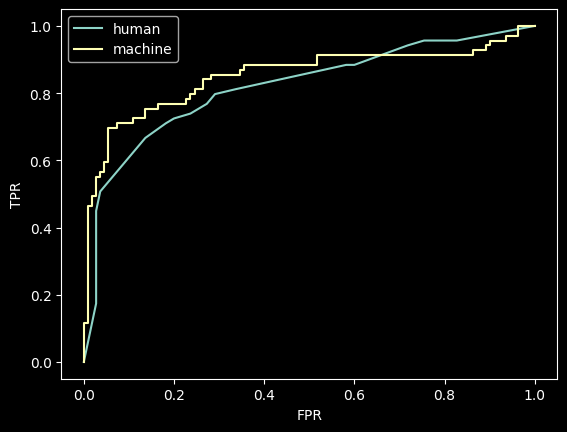

In [ ]:
fpr1, tpr1, _ = roc_curve(test['Survived'], test['score_sex_pclass_age_mean'])
fpr2, tpr2, _ = roc_curve(test['Survived'], test['score_all_importance_features'])

plt.plot(fpr1, tpr1, label='human')
plt.plot(fpr2, tpr2, label='machine')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# по графику видгно,что машинное обучение лучше.
# На отдельных участках машинное обучение ведет себя хуже, ввиду большого
# количества отсутствующих данных.

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
roc_auc_score(test['Survived'], test['score_sex_pclass_age_mean'])

0.8196969696969697

In [ ]:
roc_auc_score(test['Survived'], test['score_all_importance_features'])

0.8512516469038208

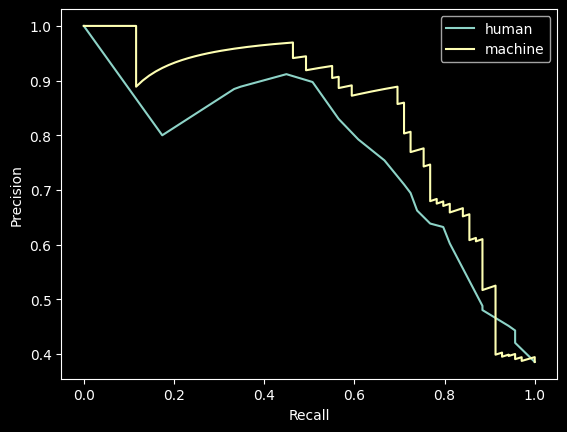

In [ ]:
precision1, recall1, _ = precision_recall_curve(test['Survived'], test['score_sex_pclass_age_mean'])
precision2, recall2, _ = precision_recall_curve(test['Survived'], test['score_all_importance_features'])

plt.plot(recall1, precision1, label='human')
plt.plot(recall2, precision2, label='machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
average_precision_score(test['Survived'], test['score_sex_pclass_age_mean'])

0.7446439471519544

In [ ]:
average_precision_score(test['Survived'], test['score_all_importance_features'])

0.8380036015479848